In [77]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.metrics import jaccard_similarity_score
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA, TruncatedSVD

from sklearn.metrics import silhouette_score
from sklearn.metrics import silhouette_samples
import matplotlib.cm as cm
from math import pi

from src.pre_processing import *

In [9]:
pd.set_option('display.max_columns', 999)

### Create train/test subsets and drop nulls

In [10]:
train_subset = create_subset(train, cols_to_keep)
test_subset = create_subset(test, cols_to_keep)

In [12]:
train_subset = train_subset.dropna()
test_subset = test_subset.dropna()

In [14]:
test_subset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1325 entries, 5750 to 6061
Data columns (total 40 columns):
responseLagSeconds             1325 non-null float64
dailyAlertNumber               1325 non-null float64
tiredness                      1325 non-null float64
feelingEmotion                 1325 non-null int64
generalEmotion                 1325 non-null object
specificEmotion                1325 non-null object
intensity                      1325 non-null float64
generalTrigger                 1325 non-null object
specificTrigger                1325 non-null object
bodySensationIntensity         1325 non-null float64
bodySensationForehead          1325 non-null int64
bodySensationEyes              1325 non-null int64
bodySensationJaw               1325 non-null int64
bodySensationNeck              1325 non-null int64
bodySensationShoulders         1325 non-null int64
bodySensationChest             1325 non-null int64
bodySensationArms              1325 non-null int64
bodySensa

In [16]:
for x in train_subset.columns:
    if x not in test_subset.columns:
        print(x)

### Dummify categoricals

In [17]:
for col in cols_to_dummify:
    dummify_clustering(train_subset, col)
    dummify_clustering(test_subset, col)

In [18]:
train_subset.head()

,responseLagSeconds,dailyAlertNumber,tiredness,feelingEmotion,intensity,bodySensationIntensity,bodySensationForehead,bodySensationEyes,bodySensationJaw,bodySensationNeck,bodySensationShoulders,bodySensationChest,bodySensationArms,bodySensationHands,bodySensationStomach,bodySensationBowel,bodySensationLegs,bodySensationFeet,bodySensationLowerBack,bodySensationUpperBack,bodySensationOther,bodySensationOtherLocation,emotionDuration,selfCareEatingWell,selfCareCooking,selfCareExercise,selfCareSeekingSupport,selfCareTimeOutside,selfCareSpiritualPractice,selfCareQualityTimeTogether,selfCareQualityTimeAlone,selfCarePet,selfCareOther,selfCareNone,selfCareOtherActivity,workPilingUp,anger,enjoyment,fear,other,sadness,afraid,angry,annoyed,anxious,ashamed,discouraged,embarrassed,enthusiastic,excited,frustrated,happy,irritated,joyful,lonely,nervous,notListed,peaceful,sad,worried,personalConcerns,socialStress,socialSupport,wellbeing,workSatisfaction,workStress,world,bodyImage,clientChallenge,clientEnjoyable,climateChange,colleagueChallenge,colleagueEnjoyable,dislikeJob,domesticPolitics,exercise,familyChallenge,financialStress,friendsChallenge,globalPolitics,healthProblems,lackMotivation,paperwork,patientChallenge,patientEnjoyable,play,productivity,relaxation,sleepDeprived,soChallenge,spiritual,success,timeFamily,timeFriends,timeSO,workload
7331,4823.0,3.0,0.25,1,0.25,0.00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,60,0,0,0,0,0,0,0,0,0,0,0,0,1.0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
5419,92.0,2.0,0.50,1,0.75,0.75,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,0,0,0,0,0,0,0,0,0,0,0,0,1.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3463,9.0,1.0,0.75,1,0.75,0.50,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,15,0,0,0,0,0,0,0,0,0,0,0,0,2.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
6981,925.0,1.0,0.75,1,0.50,0.50,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,0,0,0,0,0,0,0,0,0,0,0,0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3798,3498.0,1.0,0.25,0,0.25,0.00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


### Scale data and PCA

In [19]:
scaler = MinMaxScaler(feature_range = (0,1))
scaler.fit(train_subset)
new_train = scaler.transform(train_subset)
new_test = scaler.transform(test_subset)
new_train

array([[0.1838485 , 0.5       , 0.25      , ..., 0.        , 0.        ,
        0.        ],
       [0.1834287 , 0.25      , 0.5       , ..., 0.        , 0.        ,
        0.        ],
       [0.18342134, 0.        , 0.75      , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.18342542, 0.5       , 0.75      , ..., 0.        , 0.        ,
        0.        ],
       [0.18497107, 0.5       , 0.5       , ..., 1.        , 0.        ,
        0.        ],
       [0.18353225, 0.5       , 1.        , ..., 0.        , 0.        ,
        0.        ]])

In [20]:
new_test

array([[0.18366819, 0.        , 0.5       , ..., 0.        , 0.        ,
        0.        ],
       [0.18732313, 0.25      , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.18400103, 0.5       , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.18342134, 0.25      , 0.5       , ..., 0.        , 0.        ,
        0.        ],
       [0.18414212, 0.25      , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.18361451, 0.        , 0.5       , ..., 0.        , 0.        ,
        0.        ]])

In [37]:
svd = TruncatedSVD(n_components=10, n_iter=7)
X_svd = svd.fit_transform(new_train)
test_svd = svd.transform(new_test)

In [38]:
svd.singular_values_

array([94.39615462, 49.39108671, 33.11914508, 31.16976777, 29.09795055,
       28.01035811, 25.73917481, 24.59322477, 23.81343553, 21.47200076])

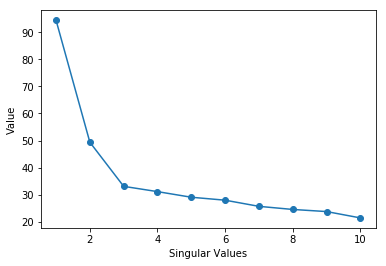

In [39]:
s = svd.singular_values_

x = [i+1 for i in range(len(s))]
plt.plot(x, s, marker='o')
plt.xlabel("Singular Values")
plt.ylabel("Value");

### kMeans Model after PCA

In [40]:
kmeans = KMeans(n_clusters=6).fit(X_svd)
predictions = kmeans.predict(test_svd)
predictions

array([0, 1, 5, ..., 3, 4, 3], dtype=int32)

In [41]:
np.unique(predictions, return_counts=True)

(array([0, 1, 2, 3, 4, 5], dtype=int32), array([170, 253, 256, 345, 151, 150]))

In [46]:
silhouette_score(test_svd, predictions, metric='euclidean')

0.3304239671441451

In [47]:
silhouette_score(test_svd, predictions, metric='jaccard')

/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype float64 was converted to bool by check_pairwise_arrays.
  warnings.warn(msg, DataConversionWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/metrics/cluster/unsupervised.py:205: RuntimeWarning: invalid value encountered in true_divide
  sil_samples /= np.maximum(intra_clust_dists, inter_clust_dists)


nan

### Plot Silhouettes

In [44]:
X = X_svd
range_n_clusters = range(2,10)

# taken from sklearn
def plot_silhouette(df):
    
    for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
        fig, (ax1) = plt.subplots(1)
        fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
        ax1.set_xlim([-0.2, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
        ax1.set_ylim([0, len(df) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
        clusterer = KMeans(n_clusters=n_clusters, random_state=10)
        cluster_labels = clusterer.fit_predict(df)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
        silhouette_avg = silhouette_score(X, cluster_labels, metric='euclidean')
        print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
        sample_silhouette_values = silhouette_samples(df, cluster_labels)

        y_lower = 10
        for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
            ith_cluster_silhouette_values = \
                sample_silhouette_values[cluster_labels == i]

            ith_cluster_silhouette_values.sort()

            size_cluster_i = ith_cluster_silhouette_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.nipy_spectral(float(i) / n_clusters)
            ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
            ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
            y_lower = y_upper + 10  # 10 for the 0 samples

        ax1.set_title("The silhouette plot for the various clusters.")
        ax1.set_xlabel("The silhouette coefficient values")
        ax1.set_ylabel("Cluster label")

    # The vertical line for average silhoutte score of all the values
        ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

        ax1.set_yticks([])  # Clear the yaxis labels / ticks
        ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

        plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

        plt.show()

For n_clusters = 2 The average silhouette_score is : 0.23522849866350626


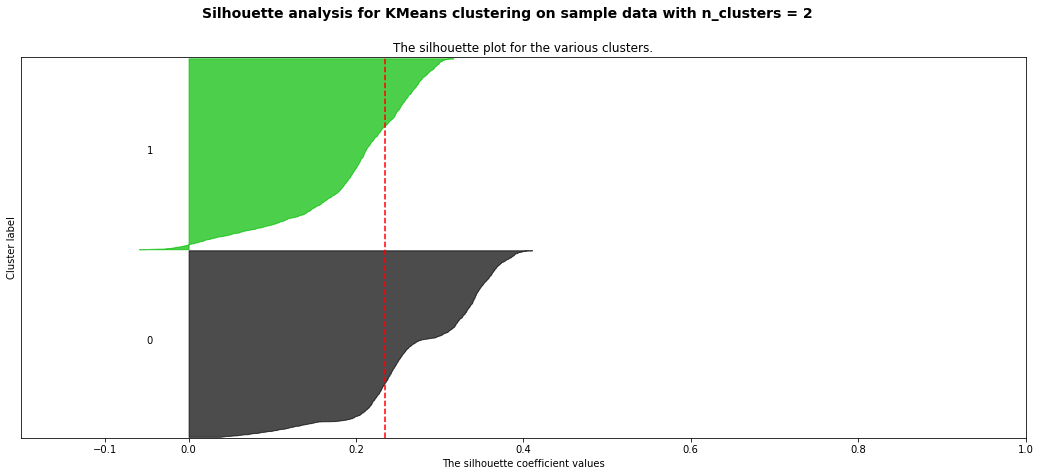

For n_clusters = 3 The average silhouette_score is : 0.24120015776795622


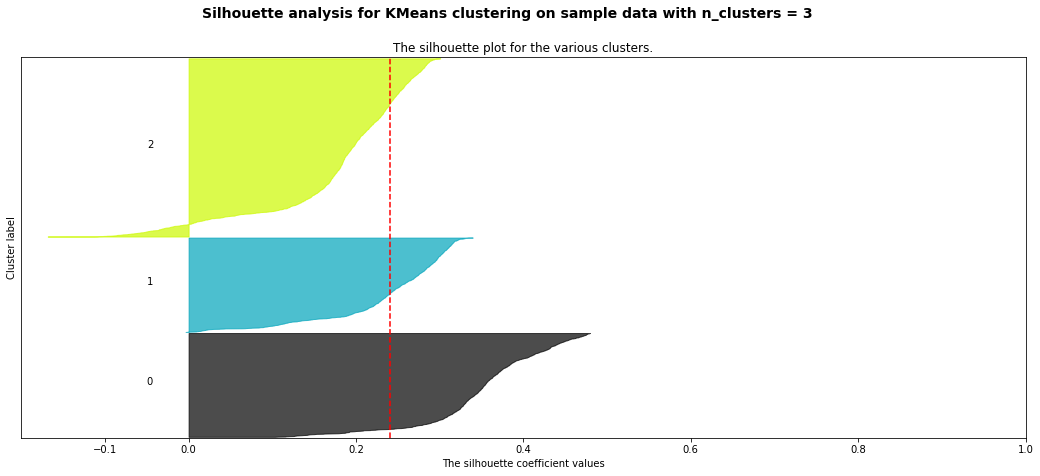

For n_clusters = 4 The average silhouette_score is : 0.26434291268263466


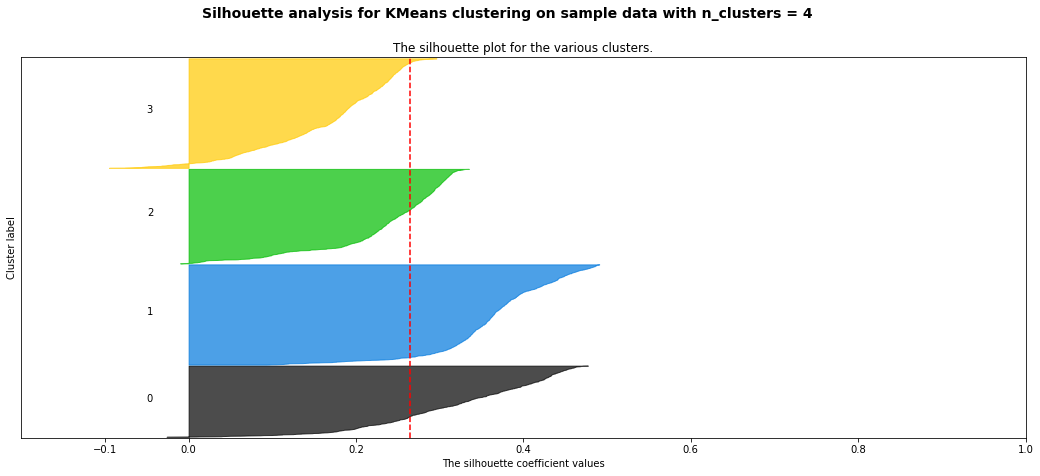

For n_clusters = 5 The average silhouette_score is : 0.29221582955416153


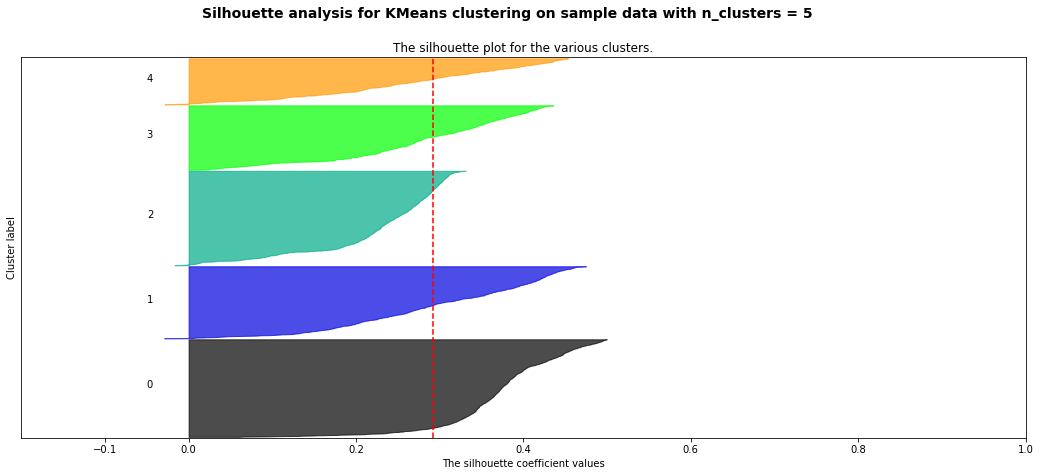

For n_clusters = 6 The average silhouette_score is : 0.3287599445638215


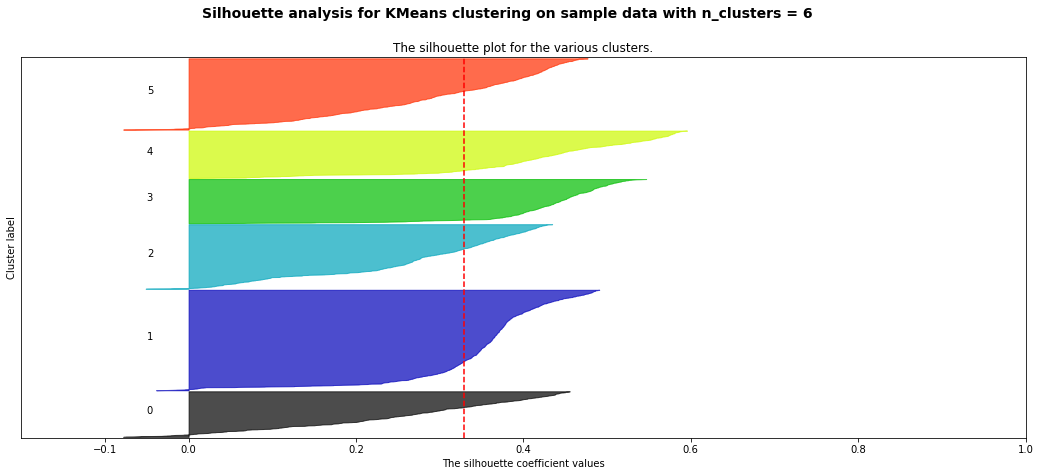

For n_clusters = 7 The average silhouette_score is : 0.30550111376756967


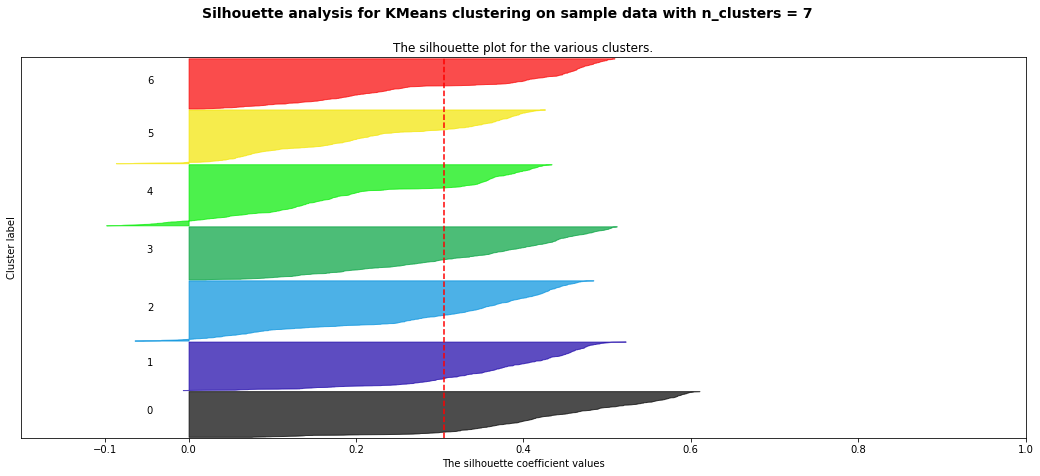

For n_clusters = 8 The average silhouette_score is : 0.3215625283697095


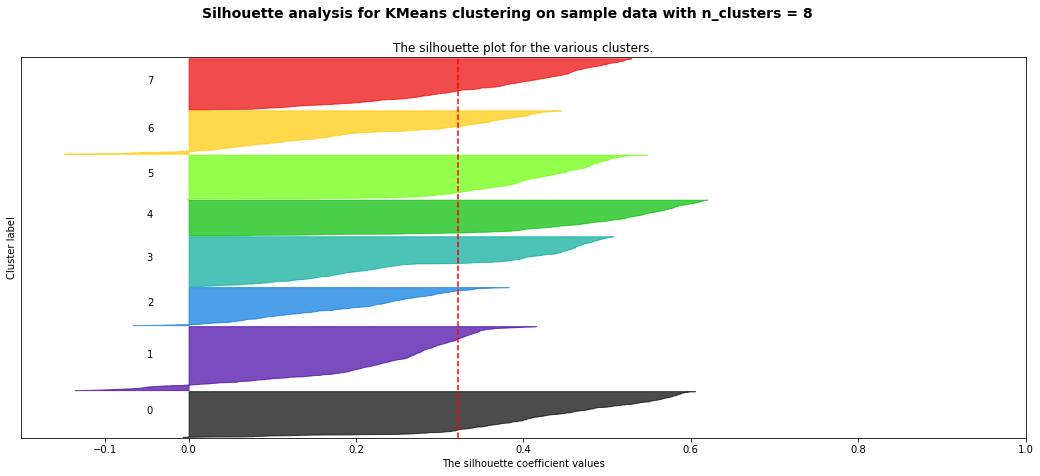

For n_clusters = 9 The average silhouette_score is : 0.33214558947443873


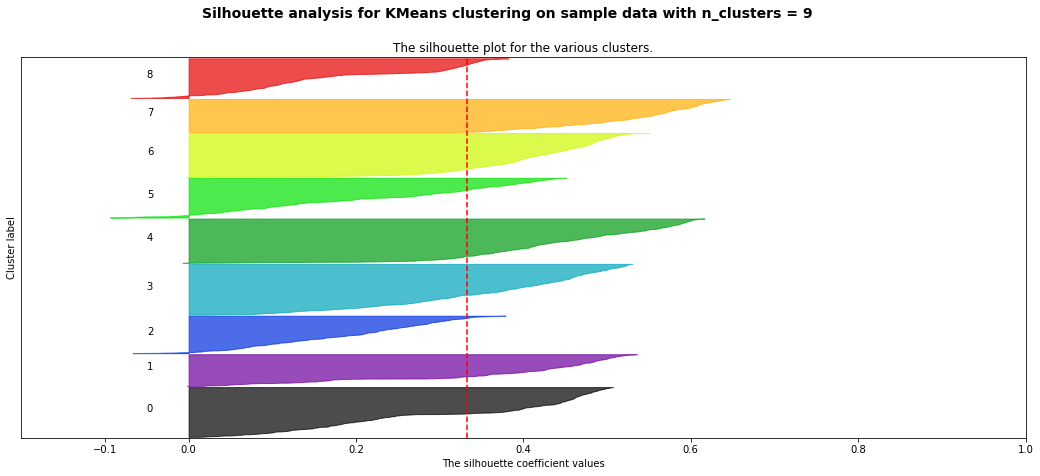

In [45]:
plot_silhouette(X)

### Check key features and add labels to dataframe

In [54]:
centroids = svd.inverse_transform(kmeans.cluster_centers_)
centroids[0]

array([ 1.74422885e-01,  1.76906151e-01,  5.99987898e-01,  7.45874155e-01,
        5.36610863e-01,  3.50360885e-01,  1.17612415e-02,  1.90187164e-03,
        4.17100170e-03,  9.55639400e-03,  1.03422257e-02,  1.86049224e-02,
       -2.09939448e-19,  1.07974286e-04,  3.76827876e-03,  3.26250295e-03,
        4.01841596e-04,  2.27045197e-05,  3.08665791e-03,  3.26500642e-03,
        1.83831081e-03,  1.83831081e-03,  3.92357731e-01,  1.68590005e-02,
        8.90339128e-03,  1.75364667e-02,  1.63010673e-02,  1.23665316e-02,
        2.17452206e-03,  1.74294842e-02,  8.26148269e-03,  5.53674274e-03,
        1.74463644e-03,  1.03317741e-02,  0.00000000e+00,  2.08950025e-01,
       -5.63679185e-03,  8.95026261e-01,  2.55644718e-03,  3.63759498e-03,
       -6.69968347e-03, -5.76477199e-04, -5.69820590e-04, -6.25479379e-03,
       -7.51857347e-03,  1.45682964e-03,  7.60379456e-03,  4.04580754e-03,
        2.76360329e-01,  1.50220246e-01,  6.03946166e-03,  2.01652089e-01,
       -4.85163913e-03,  

In [57]:
top_centroids = np.argsort(centroids)[:, -1:-11:-1]

In [58]:
top_centroids

array([[37, 64,  3,  2,  4, 86, 22,  5, 48, 91],
       [36,  3,  4, 65,  2,  5, 22, 50, 35,  1],
       [38,  3, 44, 22,  4,  5, 65,  2, 35, 95],
       [63, 37,  3,  4,  2, 85, 57, 22,  1,  5],
       [ 3, 40, 22,  4, 61, 35,  5,  1, 46,  2],
       [62, 37,  3,  4,  2, 22, 92, 51,  1, 93]])

In [93]:
# for i in top_centroids:
test_subset[predictions == 0].iloc[:, top_centroids[0]].describe()

,enjoyment,workSatisfaction,feelingEmotion,tiredness,intensity,productivity,bodySensationIntensity,enthusiastic,success
count,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000
mean,0.894118,0.947059,0.723529,0.567647,0.530882,0.441176,0.305882,0.311765,0.223529
std,0.308596,0.224578,0.448574,0.247437,0.200227,0.497995,0.267512,0.464583,0.417841
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,0.000000,0.500000,0.500000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,1.000000,1.000000,0.500000,0.500000,0.000000,0.250000,0.000000,0.000000
75%,1.000000,1.000000,1.000000,0.750000,0.750000,1.000000,0.500000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [94]:
test_subset[predictions == 1].iloc[:, top_centroids[1]].describe()

,anger,feelingEmotion,intensity,workStress,tiredness,bodySensationIntensity,frustrated,workPilingUp,dailyAlertNumber
count,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000
mean,0.905138,0.660079,0.527668,0.407115,0.406126,0.397233,0.272727,1.320158,2.181818
std,0.293605,0.474621,0.246454,0.492270,0.234292,0.317812,0.446245,1.280295,1.140239
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,1.000000,0.000000,0.250000,0.000000,0.250000,0.000000,0.000000,0.000000,1.000000
50%,1.000000,1.000000,0.500000,0.000000,0.500000,0.500000,0.000000,1.000000,2.000000
75%,1.000000,1.000000,0.750000,1.000000,0.500000,0.500000,1.000000,2.000000,3.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000,5.000000


In [96]:
test_subset[predictions == 1].iloc[:, top_centroids[1]]['emotionDuration'].value_counts()

5     64
90    56
15    45
30    42
60    29
1     17
Name: emotionDuration, dtype: int64

In [97]:
test_subset[predictions == 1].iloc[:, top_centroids[1]].head()

,anger,feelingEmotion,intensity,workStress,tiredness,bodySensationIntensity,emotionDuration,frustrated,workPilingUp,dailyAlertNumber
1159,1,1,0.50,0,0.00,0.5,5,0,3.0,2.0
3205,1,0,0.25,0,0.25,0.0,60,1,0.0,1.0
6416,1,1,0.50,0,0.75,0.0,5,0,0.0,3.0
5124,1,1,0.25,0,0.25,0.0,1,0,0.0,4.0
5429,1,1,0.50,0,0.75,0.5,1,0,0.0,4.0


In [ ]:
## Why can't I get summary stats for emotionDuration?

In [95]:
test_subset[predictions == 2].iloc[:, top_centroids[2]].describe()

,fear,feelingEmotion,anxious,intensity,bodySensationIntensity,workStress,tiredness,workPilingUp,workload
count,256.000000,256.000000,256.000000,256.000000,256.000000,256.000000,256.000000,256.000000,256.000000
mean,0.980469,0.734375,0.511719,0.475586,0.425781,0.472656,0.443359,1.417969,0.257812
std,0.138654,0.442531,0.500842,0.218371,0.275395,0.500230,0.228411,1.221181,0.438287
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.250000,0.250000,0.000000,0.250000,0.000000,0.000000
50%,1.000000,1.000000,1.000000,0.500000,0.500000,0.000000,0.500000,1.000000,0.000000
75%,1.000000,1.000000,1.000000,0.500000,0.500000,1.000000,0.500000,2.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [63]:
test_subset[predictions == 3].iloc[:, top_centroids[3]].head()

,wellbeing,enjoyment,feelingEmotion,intensity,tiredness,play,peaceful,emotionDuration,dailyAlertNumber,bodySensationIntensity
2746,1,1,0,0.75,0.75,0,0,90,2.0,0.50
3406,1,1,0,0.50,0.75,1,0,5,4.0,0.25
2870,1,1,0,0.50,0.75,1,0,90,1.0,0.00
6413,1,0,1,0.50,0.25,0,0,30,4.0,0.00
2768,1,1,1,0.50,0.50,1,0,5,2.0,0.75


In [64]:
test_subset[predictions == 4].iloc[:, top_centroids[4]].head()

,feelingEmotion,sadness,emotionDuration,intensity,socialStress,workPilingUp,bodySensationIntensity,dailyAlertNumber,discouraged,tiredness
3887,1,1,5,0.25,1,1.0,0.00,3.0,0,0.50
6201,1,0,60,0.75,0,1.0,0.75,2.0,0,0.25
5022,1,0,30,0.75,1,1.0,0.75,1.0,0,0.50
4734,1,1,30,0.50,1,0.0,0.50,2.0,0,0.50
2709,0,1,5,0.50,1,1.0,0.00,1.0,0,0.50


In [65]:
test_subset[predictions == 5].iloc[:, top_centroids[5]].head()

,socialSupport,enjoyment,feelingEmotion,intensity,tiredness,emotionDuration,timeFamily,happy,dailyAlertNumber,timeFriends
5593,1,1,0,0.50,0.00,30,1,0,3.0,0
2613,1,1,1,0.75,0.75,60,0,0,3.0,1
2524,1,1,1,0.50,0.25,5,0,1,3.0,0
6816,1,1,1,0.50,0.75,5,1,0,2.0,0
6261,1,1,0,0.50,0.25,5,1,1,2.0,0


In [66]:
test_subset['label'] = pd.Series(predictions, index=test_subset.index)

In [67]:
test_subset['label'].value_counts()

3    345
2    256
1    253
0    170
4    151
5    150
Name: label, dtype: int64

### Scatter plots

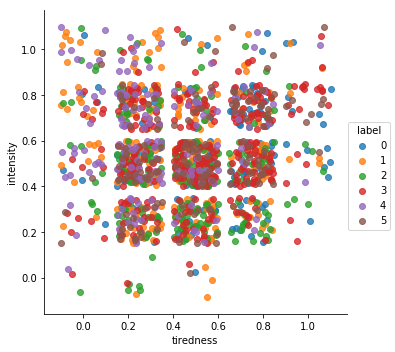

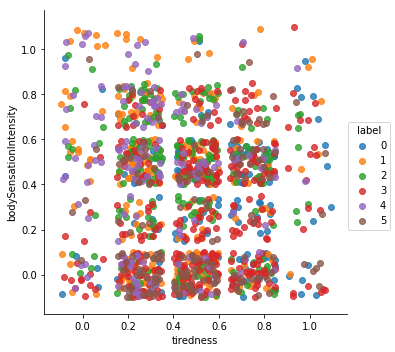

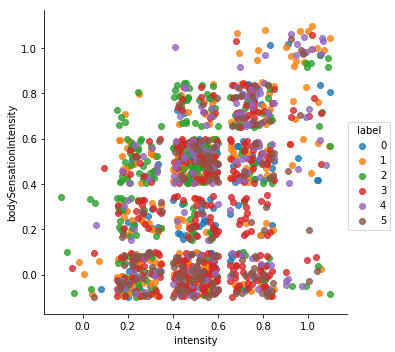

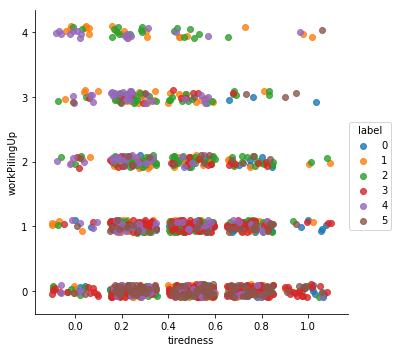

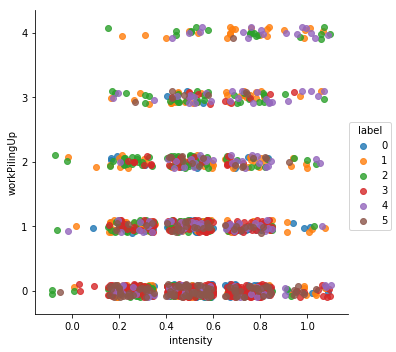

In [72]:
facet = sns.lmplot(data=test_subset, x='tiredness', y='intensity', hue='label', 
                   fit_reg=False, legend=True, legend_out=True, x_jitter=.1, y_jitter=0.1)
facet2 = sns.lmplot(data=test_subset, x='tiredness', y='bodySensationIntensity', hue='label', 
                   fit_reg=False, legend=True, legend_out=True, x_jitter=.1, y_jitter=0.1)
# facet3 = sns.lmplot(data=test_subset, x='tiredness', y='emotionDuration', hue='label', 
#                    fit_reg=False, legend=True, legend_out=True, x_jitter=0, y_jitter=0)
facet4 = sns.lmplot(data=test_subset, x='intensity', y='bodySensationIntensity', hue='label', 
                   fit_reg=False, legend=True, legend_out=True, x_jitter=.1, y_jitter=0.1)
facet5 = sns.lmplot(data=test_subset, x='tiredness', y='workPilingUp', hue='label', 
                   fit_reg=False, legend=True, legend_out=True, x_jitter=.1, y_jitter=.1)
facet6 = sns.lmplot(data=test_subset, x='intensity', y='workPilingUp', hue='label', 
                   fit_reg=False, legend=True, legend_out=True, x_jitter=.1, y_jitter=0.1)

### Swarm Plots

/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:2783: UserWarning: The `split` parameter has been renamed to `dodge`.
  warnings.warn(msg, UserWarning)


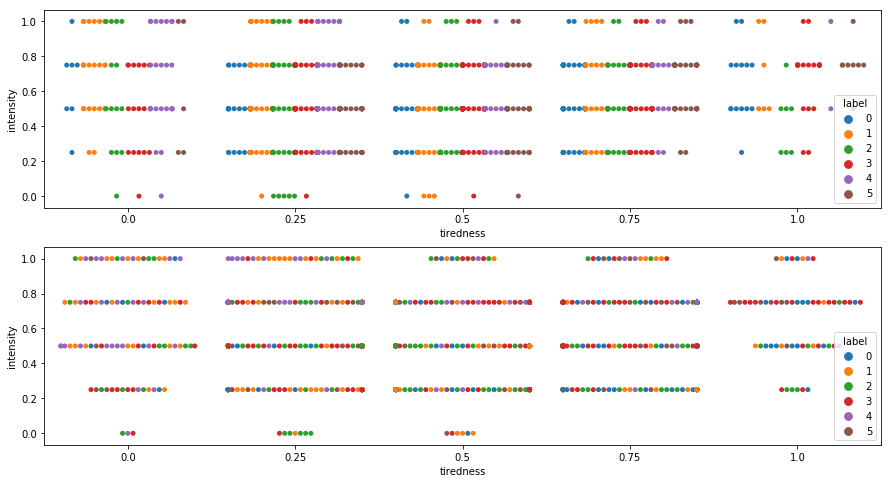

In [106]:
fig, ax = plt.subplots(2, 1, figsize=(15, 8))
# for i in range(6):
sns.swarmplot(x='tiredness', y='intensity', hue='label', split=True, data=test_subset, ax=ax[0]);
sns.swarmplot(x='tiredness', y='intensity', hue='label', data=test_subset, ax=ax[1]);

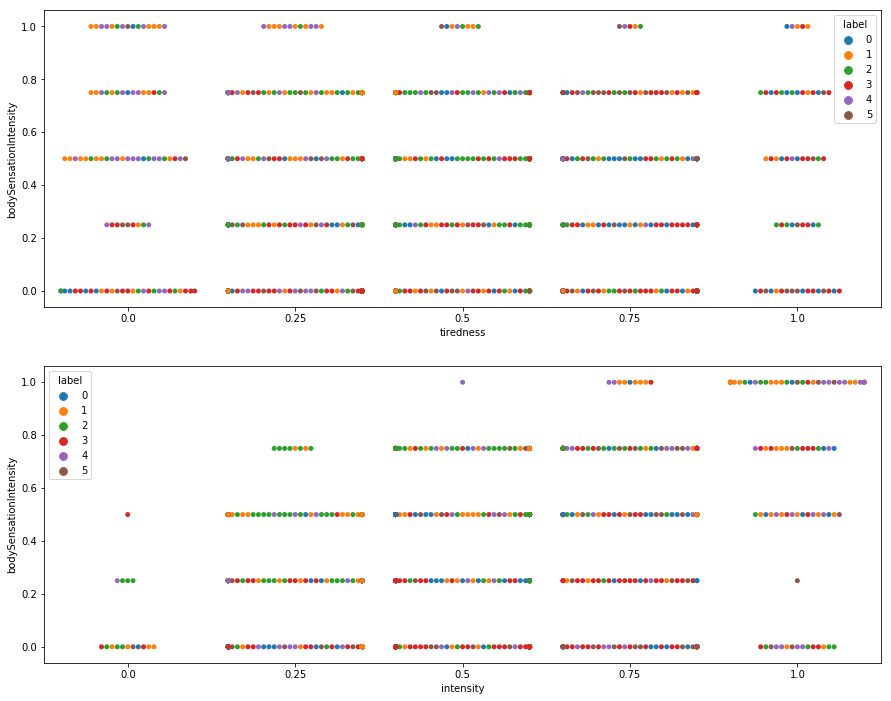

In [109]:
fig, ax = plt.subplots(2, 1, figsize=(15, 12))
# for i in range(6):
sns.swarmplot(x='tiredness', y='bodySensationIntensity', hue='label', data=test_subset, ax=ax[0]);
sns.swarmplot(x='intensity', y='bodySensationIntensity', hue='label', data=test_subset, ax=ax[1]);

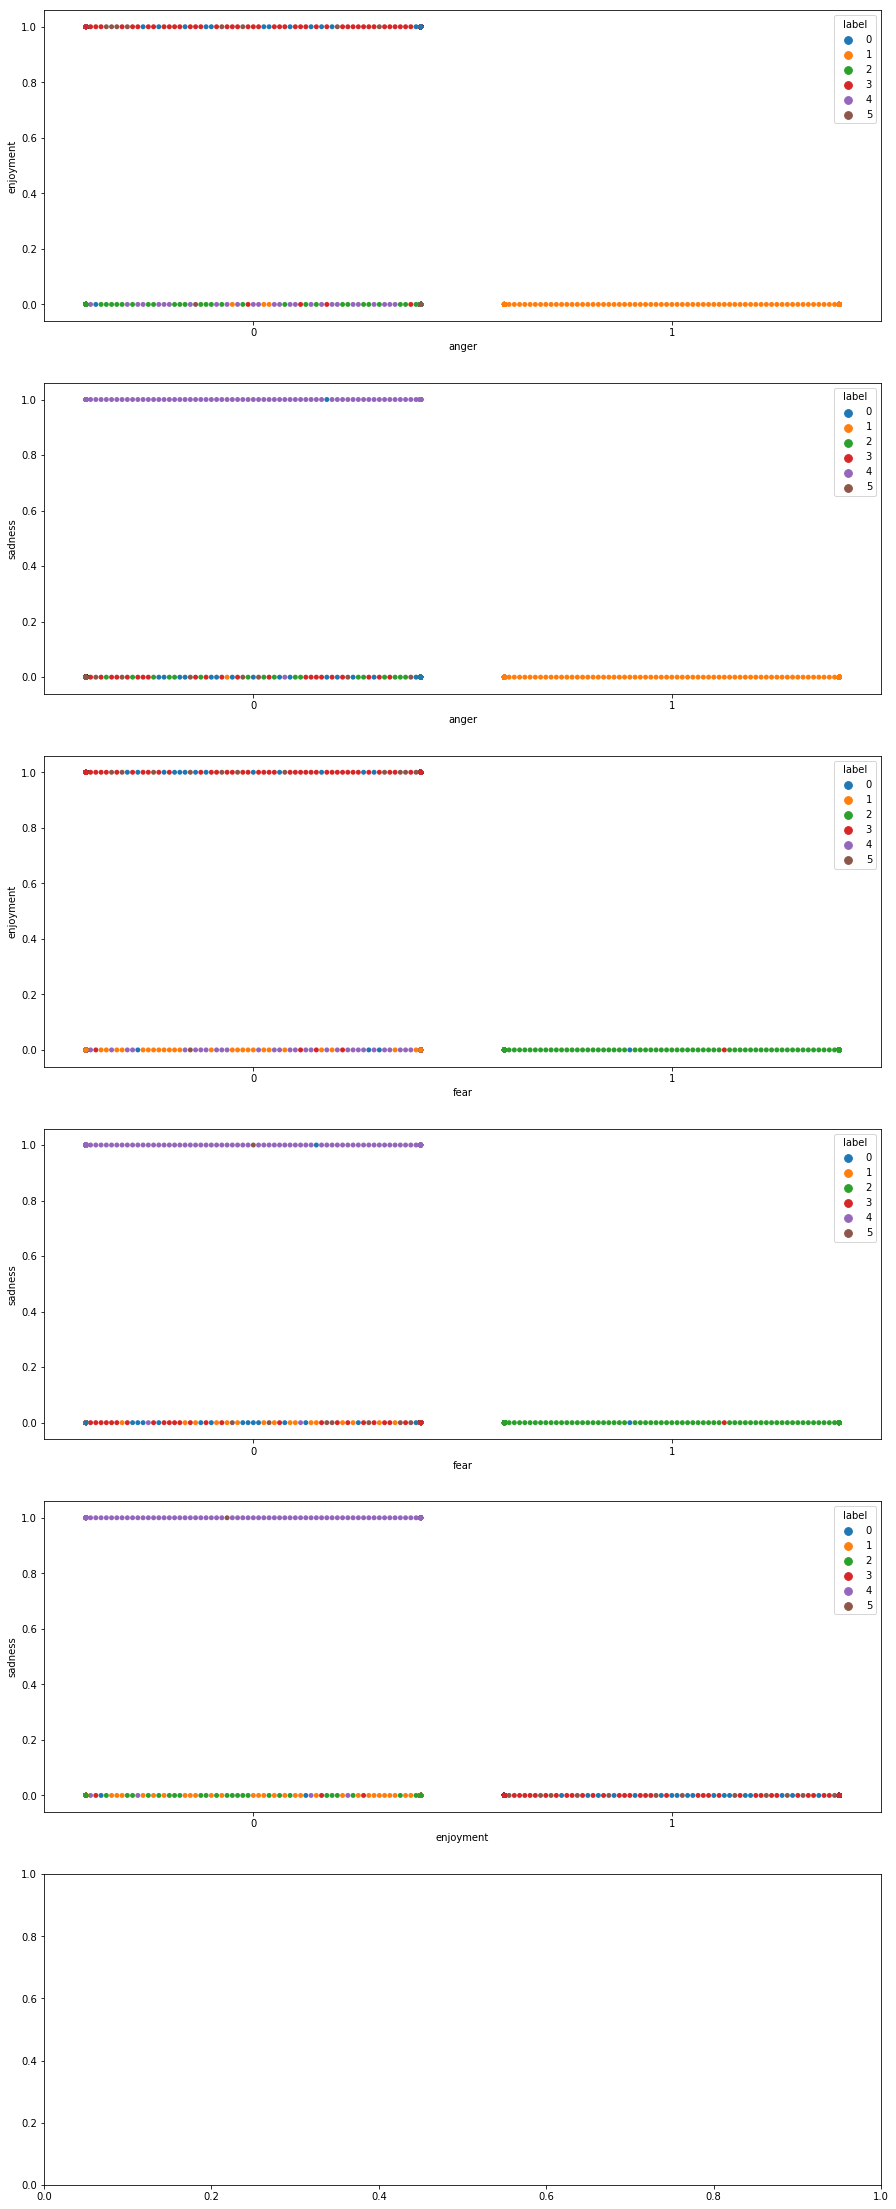

In [114]:
fig, ax = plt.subplots(5, 1, figsize=(15, 40))

emotions1 = ['anger', 'fear', 'enjoyment']
emotions2 = ['enjoyment', 'sadness']
num = 0

for e1 in emotions1:
    for e2 in emotions2:
        if e1 == e2:
            continue
        else:
            sns.swarmplot(x=e1, y=e2, hue='label', data=test_subset, ax=ax[num]);
            num += 1

# for i in range(6):
#     sns.swarmplot(x='intensity', y='bodySensationIntensity', data=test_subset[predictions == i], ax=ax[i]);

### Radar Charts

In [183]:
# col_list must begin with 'label' category to define clusters

def prep_for_radar(df, col_list):
    X = df[col_list]
    clusters = X.iloc[:, 0].values
    X.drop(['label'], axis=1, inplace=True)
    return X, clusters

In [190]:
cols = ['label', 'anger', 'enjoyment', 'sadness', 'fear', 'intensity']
cols2 = ['label', 'intensity', 'emotionDuration', 'sadness', 'fear', 'intensity']

In [191]:
X1, clusters1 = prep_for_radar(test_subset, cols)

/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [195]:
X1

,anger,enjoyment,sadness,fear,intensity
5750,0,1,0,0,0.75
1159,1,0,0,0,0.50
5593,0,1,0,0,0.50
2613,0,1,0,0,0.75
2746,0,1,0,0,0.75
6376,0,0,0,1,0.75
3887,0,0,1,0,0.25
3406,0,1,0,0,0.50
5081,0,0,0,1,0.75
6201,0,0,0,0,0.75


In [193]:
clusters1

array([0, 1, 5, ..., 3, 4, 3], dtype=int32)

In [167]:
emotions_df = test_subset[['label', 'anger', 'enjoyment', 'sadness', 'fear']]

In [168]:
emotions_df.head()

,label,anger,enjoyment,sadness,fear
5750,0,0,1,0,0
1159,1,1,0,0,0
5593,5,0,1,0,0
2613,5,0,1,0,0
2746,3,0,1,0,0


In [181]:
radar_df = test_subset[['label', 'tiredness', 'intensity', 'emotionDuration', 'bodySensationIntensity', 'workPilingUp']]

In [182]:
radar_df.head()

,label,tiredness,intensity,emotionDuration,bodySensationIntensity,workPilingUp
5750,0,0.50,0.75,30,0.75,0.0
1159,1,0.00,0.50,5,0.50,3.0
5593,5,0.00,0.50,30,0.50,3.0
2613,5,0.75,0.75,60,0.50,0.0
2746,3,0.75,0.75,90,0.50,0.0


In [171]:
clusters = emotions_df.iloc[:, 0].values

In [172]:
clusters

array([0, 1, 5, ..., 3, 4, 3], dtype=int32)

In [173]:
emotions_df.drop(['label'], axis=1, inplace=True)

/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [170]:
emotions_df.describe()

,label,anger,enjoyment,sadness,fear
count,1325.000000,1325.000000,1325.000000,1325.000000,1325.000000
mean,2.380377,0.172830,0.458868,0.091321,0.191698
std,1.515352,0.378243,0.498493,0.288173,0.393785
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000
50%,2.000000,0.000000,0.000000,0.000000,0.000000
75%,3.000000,0.000000,1.000000,0.000000,0.000000
max,5.000000,1.000000,1.000000,1.000000,1.000000


In [178]:
X = emotions_df
X.head()

,anger,enjoyment,sadness,fear
5750,0,1,0,0
1159,1,0,0,0
5593,0,1,0,0
2613,0,1,0,0
2746,0,1,0,0


In [198]:
scaler_radar = StandardScaler()
scaler.fit(X1)
X1 = scaler.transform(X1)

In [177]:
list(emotions_df)

['anger', 'enjoyment', 'sadness', 'fear']

In [188]:
# function to plot radar graph; modified slightly from Elliot's post (https://medium.com/@Saslow/high-dimensionality-visualization-in-python-65790a4b1719)

def plot_radar(df, clusters):
    # number of variable
    categories=list(df)
    N = len(categories)

    #Define the preset angles for your graph
    angles = [n / float(N) * 2 * pi for n in range(N)]
    angles += angles[:1]

    #Get the mean values on all features from specific cluster
    values = df[clusters == 0].mean(axis = 0)

    #add value to the end so that the fill will work correctly
    values = np.append(values,values[:1])

    #create axis
    ax = plt.subplot(111, polar=True)

    # change the xticks and y ticks
    plt.xticks(angles[:-1], categories, color='grey', size=8)
    plt.yticks([2,4,6], ["2","4","6"], color="grey", size=7)
    ax.set_rlabel_position(0)

    #Plot the values
    ax.plot(angles, values, linewidth=1, linestyle='solid')

    # Fill area
    ax.fill(angles, values, alpha=0.2,label = 'Cluster 1')

    # Do it again for other clusters
    values = X[clusters == 1].mean(axis = 0)
    values = np.append(values,values[:1])
    ax.plot(angles, values, linewidth=1, linestyle='solid')
    ax.fill(angles, values, alpha=0.2,label = 'Cluster 2')

    # Do it again for other clusters
    values = X[clusters == 2].mean(axis = 0)
    values = np.append(values,values[:1])
    ax.plot(angles, values, linewidth=1, linestyle='solid')
    ax.fill(angles, values, alpha=0.2,label = 'Cluster 3')

    # Do it again for other clusters
    values = X[clusters == 3].mean(axis = 0)
    values = np.append(values,values[:1])
    ax.plot(angles, values, linewidth=1, linestyle='solid')
    ax.fill(angles, values, alpha=0.2,label = 'Cluster 4')

    # Do it again for other clusters
    values = X[clusters == 4].mean(axis = 0)
    values = np.append(values,values[:1])
    ax.plot(angles, values, linewidth=1, linestyle='solid')
    ax.fill(angles, values, alpha=0.2,label = 'Cluster 5')

    # And for the last cluster
    values = X[clusters == 5].mean(axis = 0)
    values = np.append(values,values[:1])
    ax.plot(angles, values, linewidth=1, linestyle='solid')
    ax.fill(angles, values, alpha=0.2,label = 'Cluster 6')

    plt.legend(bbox_to_anchor=(1, 1),
               bbox_transform=plt.gcf().transFigure)
    plt.title('Emotion Clusters on Radar Graph');
    plt.subplots_adjust(hspace=.8)

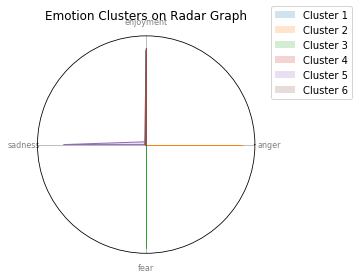

In [189]:
plot_radar(X, clusters)

ValueError: x and y must have same first dimension, but have shapes (1326,) and (6,)

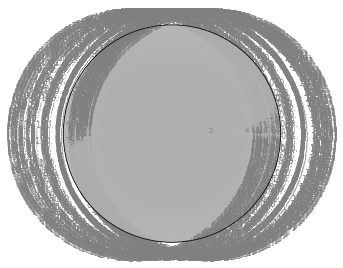

In [199]:
plot_radar(X1, clusters1)